In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
labels = pd.read_csv('Data/upvote_features.txt', header=None)
X = pd.read_csv('Data/upvote_data.csv', header=None)
y = pd.read_csv('Data/upvote_labels.txt', header=None)

## Problem 1a

In [168]:
X_mod = X.copy()
X_mod.insert(0,'bias',1)
X_mod.columns = range(X_mod.columns.size)

In [169]:
train_x,train_y = X_mod.loc[:3999,:],y.loc[:3999,:]
test_x,test_y = X_mod.loc[4000:,:],y.loc[4000:,:]

In [170]:
def mse(predict,actual):
    return float(np.sum((np.reshape(actual,len(actual)) - predict)**2)/len(predict))

def lms(x,y,iterations=100,u=0.01):
    N = len(x)
    xT = np.transpose(x)
    w = np.zeros([len(x[0]),1])
    
    for _ in range(iterations):
        grad = 2/N*(((xT @ x) @ w) - (xT @ y))
        w = w - u*grad
    return w

In [174]:
w = lms(train_x.to_numpy(),train_y.to_numpy(),100)

In [181]:
for i in w:
    if not np.isnan(i[0]):
        print(i)

## Problem 1b

In [83]:
from sklearn import linear_model

In [81]:
train_x,train_y = X.loc[:3999,:],y.loc[:3999,:]
val_x,val_y = X.loc[4000:4999,:],y.loc[4000:4999,:]
test_x,test_y = X.loc[5000:,:],y.loc[5000:,:]

In [86]:
import warnings 
warnings.filterwarnings("ignore")

# reg_constant = np.logspace(-10,1,num=10)
reg_constant = [10**i for i in range(-10,1)]
coef = []
intercept = []
train_err = []
val_err = []
for reg in reg_constant:
    clf = linear_model.Lasso(alpha=reg,tol=3e-6,max_iter=1e4)
    clf.fit(train_x.to_numpy(), train_y.to_numpy())
    train_err.append(mse(clf.predict(train_x.to_numpy()), train_y.to_numpy()))
    val_err.append(mse(clf.predict(val_x.to_numpy()), val_y.to_numpy()))
    intercept.append(clf.intercept_)
    coef.append(clf.coef_)

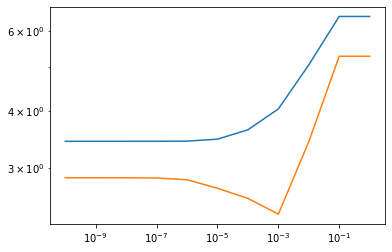

In [147]:
%matplotlib inline
plt.loglog(reg_constant, train_err, reg_constant, val_err)

In [158]:
alpha=1e-7

clf = linear_model.Lasso(alpha=alpha,tol=3e-6,max_iter=1e4)
clf.fit(test_x.to_numpy(), test_y.to_numpy())
print(f"Test Error for lambda = {alpha}: {mse(clf.predict(test_x.to_numpy()), test_y.to_numpy())}")

Test Error for lambda = 0: 2.465583739005571


## Problem 1c

In [76]:
from tensorflow import keras

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.regularizers import L1
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import StandardScaler

SEED = 1

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

scaler = StandardScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [140]:
alpha=1e-3

In [165]:
model = Sequential()
model.add(Dense(1, input_dim=X_train.shape[1], kernel_regularizer=L1(l1=alpha), activation='relu')) 
model.add(Dropout(0.5))
model.add(Dense(1024, kernel_regularizer=L1(l1=alpha), activation='relu')) 
model.add(Dropout(0.5))
model.add(Dense(1, kernel_regularizer=L1(l1=alpha), activation='linear'))

model.compile(loss='mse', optimizer="adam", metrics=['accuracy']) 

In [118]:
callbacks = [EarlyStopping(monitor='val_loss', patience=10, verbose=2)]

In [119]:
batch_size = 128
n_epochs = 200

In [166]:
model.fit(X_train.values, y_train, batch_size=batch_size, epochs=n_epochs, validation_split=0.2,     
             verbose=2, callbacks=callbacks)

Epoch 1/200
30/30 - 0s - loss: 6.7142 - accuracy: 0.3393 - val_loss: 7.0274 - val_accuracy: 0.3115 - 346ms/epoch - 12ms/step
Epoch 2/200
30/30 - 0s - loss: 5.4814 - accuracy: 0.2724 - val_loss: 6.6936 - val_accuracy: 0.3115 - 93ms/epoch - 3ms/step
Epoch 3/200
30/30 - 0s - loss: 5.6944 - accuracy: 0.2724 - val_loss: 6.8670 - val_accuracy: 0.3115 - 96ms/epoch - 3ms/step
Epoch 4/200
30/30 - 0s - loss: 5.2721 - accuracy: 0.2724 - val_loss: 6.6688 - val_accuracy: 0.3115 - 91ms/epoch - 3ms/step
Epoch 5/200
30/30 - 0s - loss: 5.4204 - accuracy: 0.2724 - val_loss: 6.6268 - val_accuracy: 0.3115 - 90ms/epoch - 3ms/step
Epoch 6/200
30/30 - 0s - loss: 5.5878 - accuracy: 0.2724 - val_loss: 6.6747 - val_accuracy: 0.3115 - 94ms/epoch - 3ms/step
Epoch 7/200
30/30 - 0s - loss: 5.3449 - accuracy: 0.2724 - val_loss: 6.7434 - val_accuracy: 0.3115 - 92ms/epoch - 3ms/step
Epoch 8/200
30/30 - 0s - loss: 5.4324 - accuracy: 0.2724 - val_loss: 6.6380 - val_accuracy: 0.3115 - 86ms/epoch - 3ms/step
Epoch 9/200
30

In [167]:
score = model.evaluate(X_test.values, y_test)
print('Test accuracy: %.2f%%' % (score[1]*100))
print('Test MSE: %.2f' % (score[0]))

38/38 [==============================] - 0s 509us/step - loss: 3.9192 - accuracy: 0.2908
Test accuracy: 29.08%
Test MSE: 3.92
